In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv(r'../../results/strategies-simulation-optimized-variables-v02.csv', low_memory=False)

In [ ]:
df_objective = pd.read_csv(r'../../results/variable_coefficients.csv', low_memory=False)

In [ ]:
# Vectorized string manipulation
df_objective['Variable'] = 'x_CDB[' + df_objective['Variable'].str.join(',') + ']'

# Convert 'Variable' column to category data type
df['Variable'] = df['Variable'].astype('category')
df_objective['Variable'] = df_objective['Variable'].astype('category')

# Filter 'df' to include only rows where variable starts with 'x'
df_x = df[df['Variable'].str.startswith('x')]

# Merge 'df_x' and 'df_objective' on 'Variable'
df_x = df_x.merge(df_objective, on='Variable', how='left')


In [7]:
df_objective

,Variable,Coefficient
0,"x_CDB[(,',l,o,w,-,c,a,p,',,, ,0,,, ,0,,, ,5,2,...",2.117975
1,"x_CDB[(,',l,o,w,-,c,a,p,',,, ,0,,, ,1,,, ,5,2,...",2.117975
2,"x_CDB[(,',l,o,w,-,c,a,p,',,, ,0,,, ,2,,, ,5,2,...",2.117975
3,"x_CDB[(,',l,o,w,-,c,a,p,',,, ,0,,, ,3,,, ,5,2,...",2.117975
4,"x_CDB[(,',l,o,w,-,c,a,p,',,, ,0,,, ,4,,, ,5,2,...",2.117975
...,...,...
93950995,"x_CDB[(,',l,o,w,-,c,a,p,',,, ,9,9,9,,, ,8,,, ,...",0.000000
93950996,"x_CDB[(,',l,o,w,-,c,a,p,',,, ,9,9,9,,, ,9,,, ,...",0.000000
93950997,"x_CDB[(,',l,o,w,-,c,a,p,',,, ,9,9,9,,, ,1,0,,,...",0.000000
93950998,"x_CDB[(,',l,o,w,-,c,a,p,',,, ,9,9,9,,, ,1,1,,,...",0.000000


In [8]:
df

,Variable,Value
0,"x_CDB[low-cap,0,0,528277]",0.0
1,"x_CDB[low-cap,0,0,528282]",0.0
2,"x_CDB[low-cap,0,0,528283]",0.0
3,"x_CDB[low-cap,0,0,528286]",0.0
4,"x_CDB[low-cap,0,0,528288]",0.0
...,...,...
93990034,"z_BEB[low-cap,999,8]",0.0
93990035,"z_BEB[low-cap,999,9]",0.0
93990036,"z_BEB[low-cap,999,10]",0.0
93990037,"z_BEB[low-cap,999,11]",0.0


In [2]:
SQ =pd.read_csv(r'../../results/computed-fuel-rates-oct2021-sep2022.csv', usecols=['ServiceDateTime', 'Month', 'Route','Vehicle','Powertrain','VehicleModel','Energy'], delimiter=',', skiprows=0, low_memory=False)

In [11]:
# Convert 'ServiceDateTime' to datetime
SQ['ServiceDateTime'] = pd.to_datetime(SQ['ServiceDateTime'])

# Filter for the date October 29, 2021
SQ_oct_29 = SQ[SQ['ServiceDateTime'].dt.date == pd.to_datetime('2021-10-29').date()]

# Calculate the sum of 'Energy' for October 29, 2021
energy_sum_oct_29 = SQ_oct_29['Energy'].sum()

print("Total Energy consumption for October 29, 2021: ", energy_sum_oct_29)


Total Energy consumption for October 29, 2021:  4579.233235262123


In [12]:
Energy_BM=1260.854567534327

In [13]:
Energy_SQ=13*energy_sum_oct_29

In [14]:
Energy_SQ

59530.0320584076

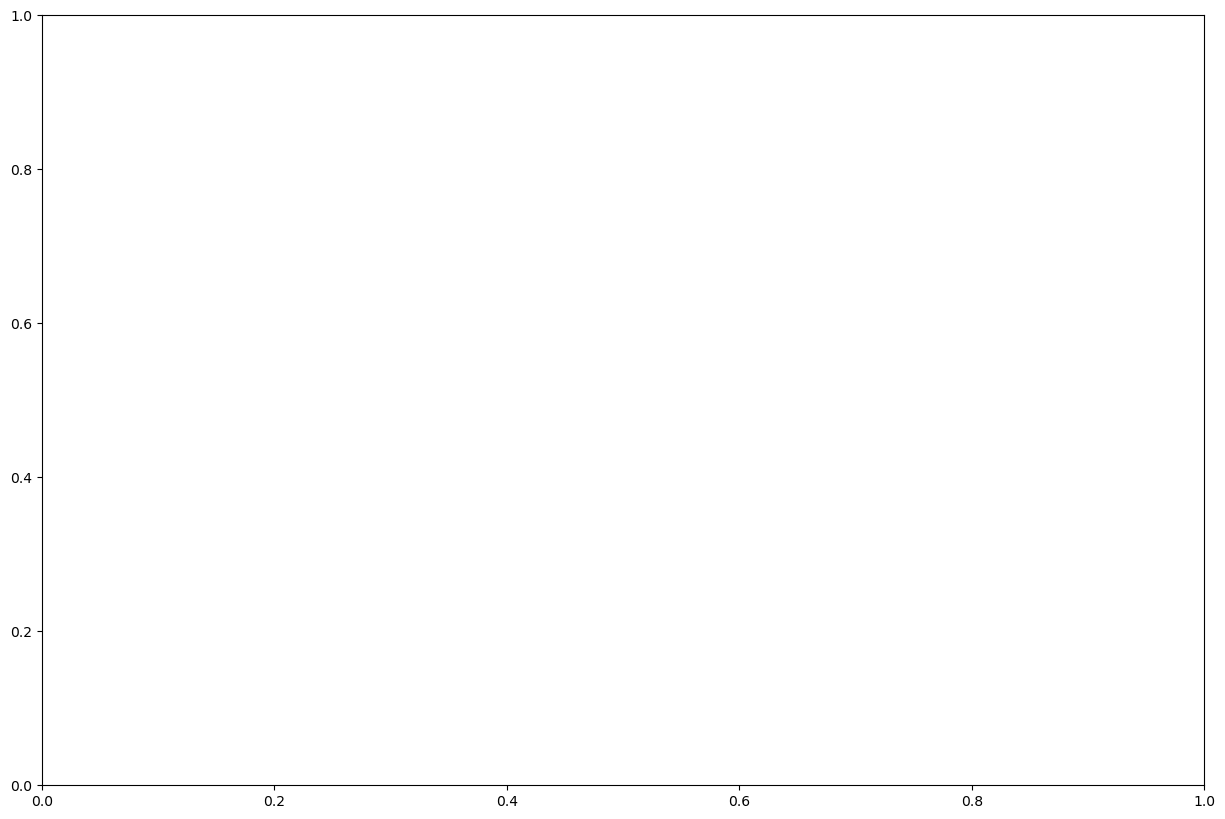

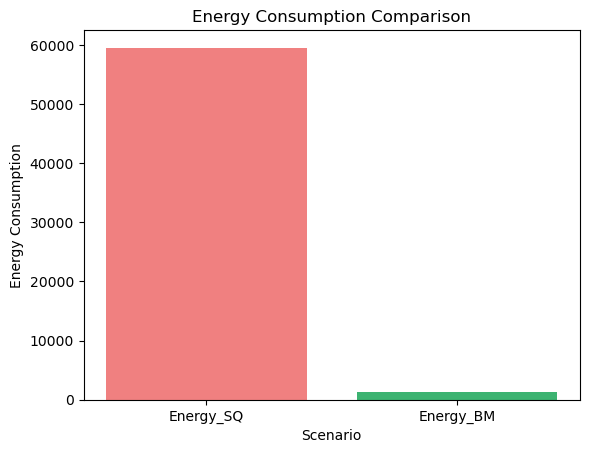

In [18]:
#Plot
fig, ax = plt.subplots(figsize=(15,10))
# create lists for the plot
energy_types = ['Energy_SQ', 'Energy_BM']
values = [Energy_SQ, Energy_BM]
colors = ['lightcoral', 'mediumseagreen']

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Create a bar plot
ax.bar(energy_types, values, color=colors)

# Set the title and labels
ax.set_title('Energy Consumption Comparison')
ax.set_xlabel('Scenario')
ax.set_ylabel('Energy Consumption')

# Display the plot
plt.show()

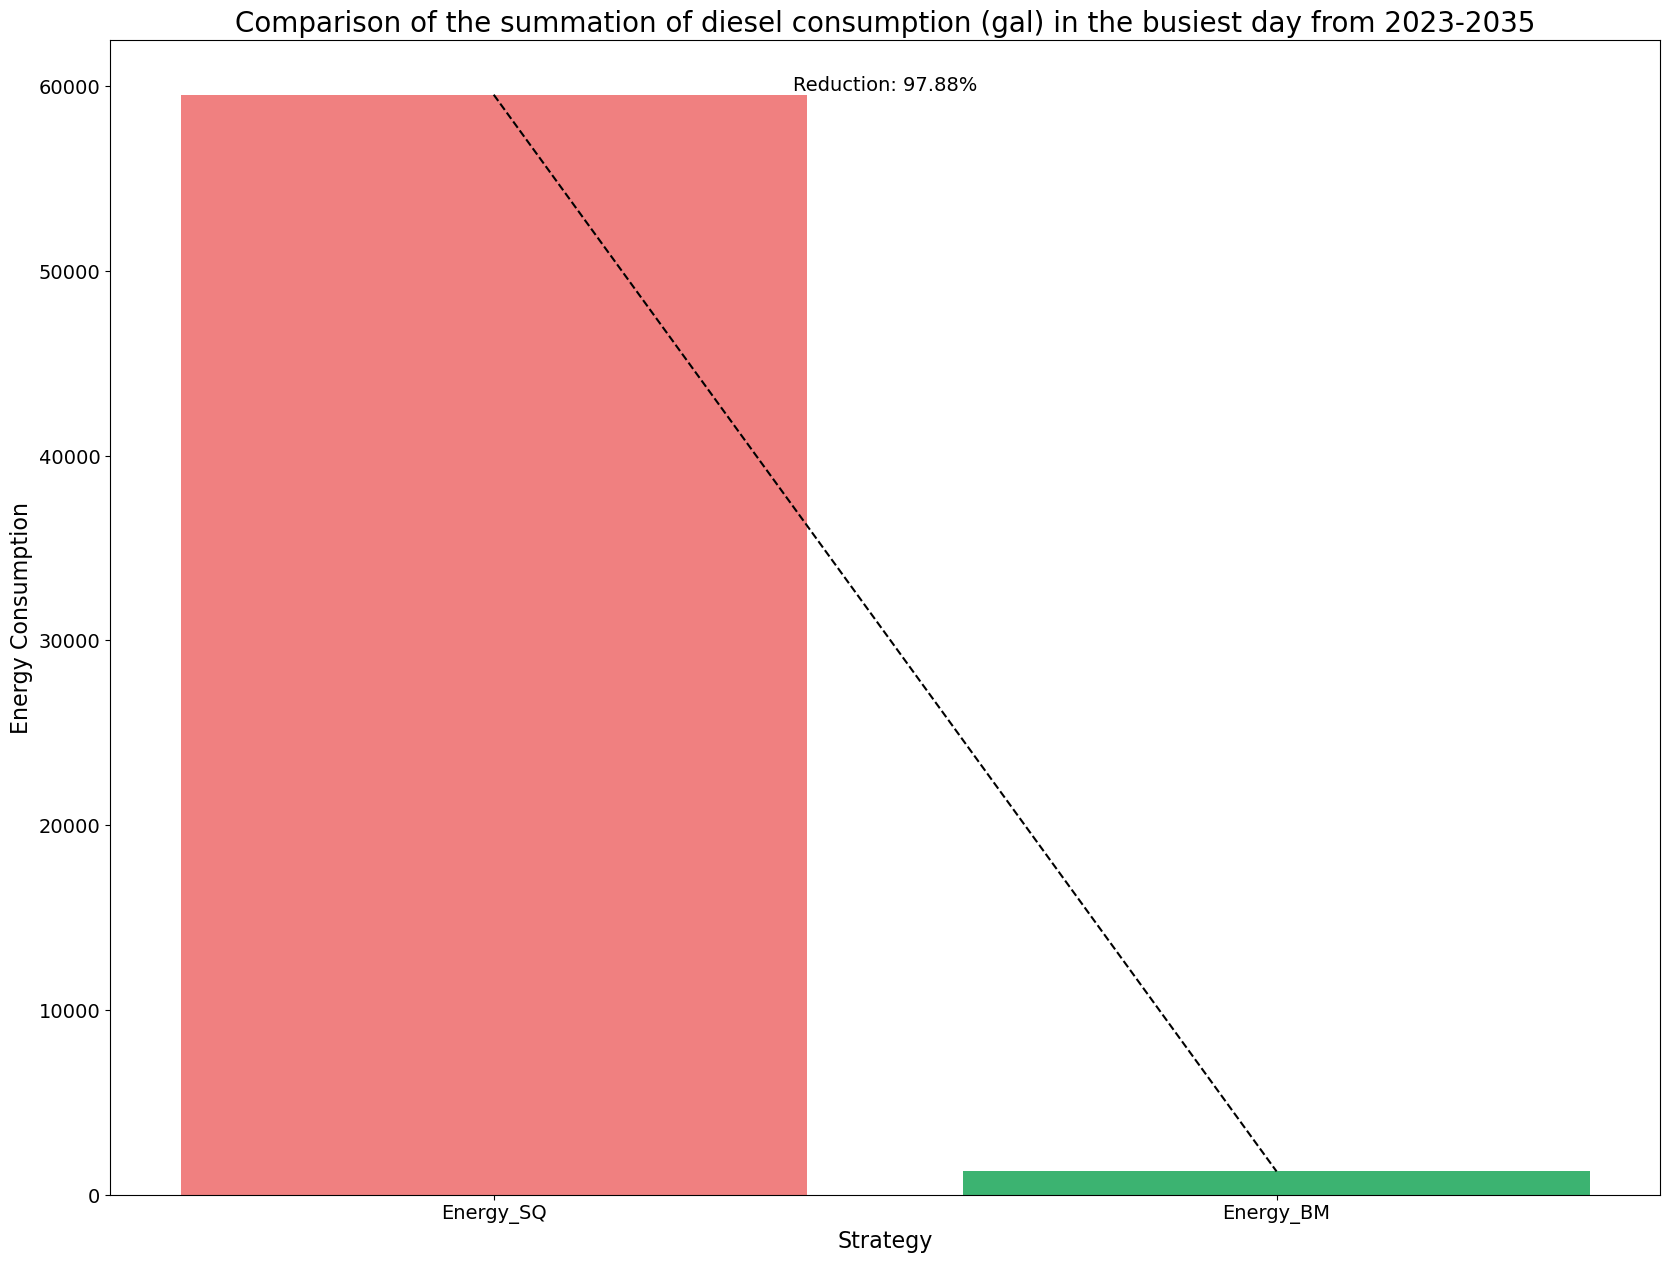

In [23]:
import matplotlib.pyplot as plt

# Compute the percent reduction
reduction = ((Energy_SQ - Energy_BM) / Energy_SQ) * 100

# Create lists for the plot
energy_types = ['Energy_SQ', 'Energy_BM']
values = [Energy_SQ, Energy_BM]
colors = ['lightcoral', 'mediumseagreen']

# Create a figure and a set of subplots with larger size
fig, ax = plt.subplots(figsize=(20, 15))

# Create a bar plot
bars = ax.bar(energy_types, values, color=colors)

# Set the title and labels with larger font sizes
ax.set_title('Comparison of the summation of diesel consumption (gal) in the busiest day from 2023-2035', fontsize=20)
ax.set_xlabel('Strategy', fontsize=16)
ax.set_ylabel('Energy Consumption', fontsize=16)

# Increase the font size for tick labels
ax.tick_params(axis='both', labelsize=14)

# Draw line between the tops of the bars and annotate it with the percent reduction
plt.plot(energy_types, values, color='black', linestyle='dashed')
plt.text(0.5, max(values), 'Reduction: {:.2f}%'.format(reduction), color='black', ha='center', va='bottom', fontsize=14)

# Display the plot
plt.show()


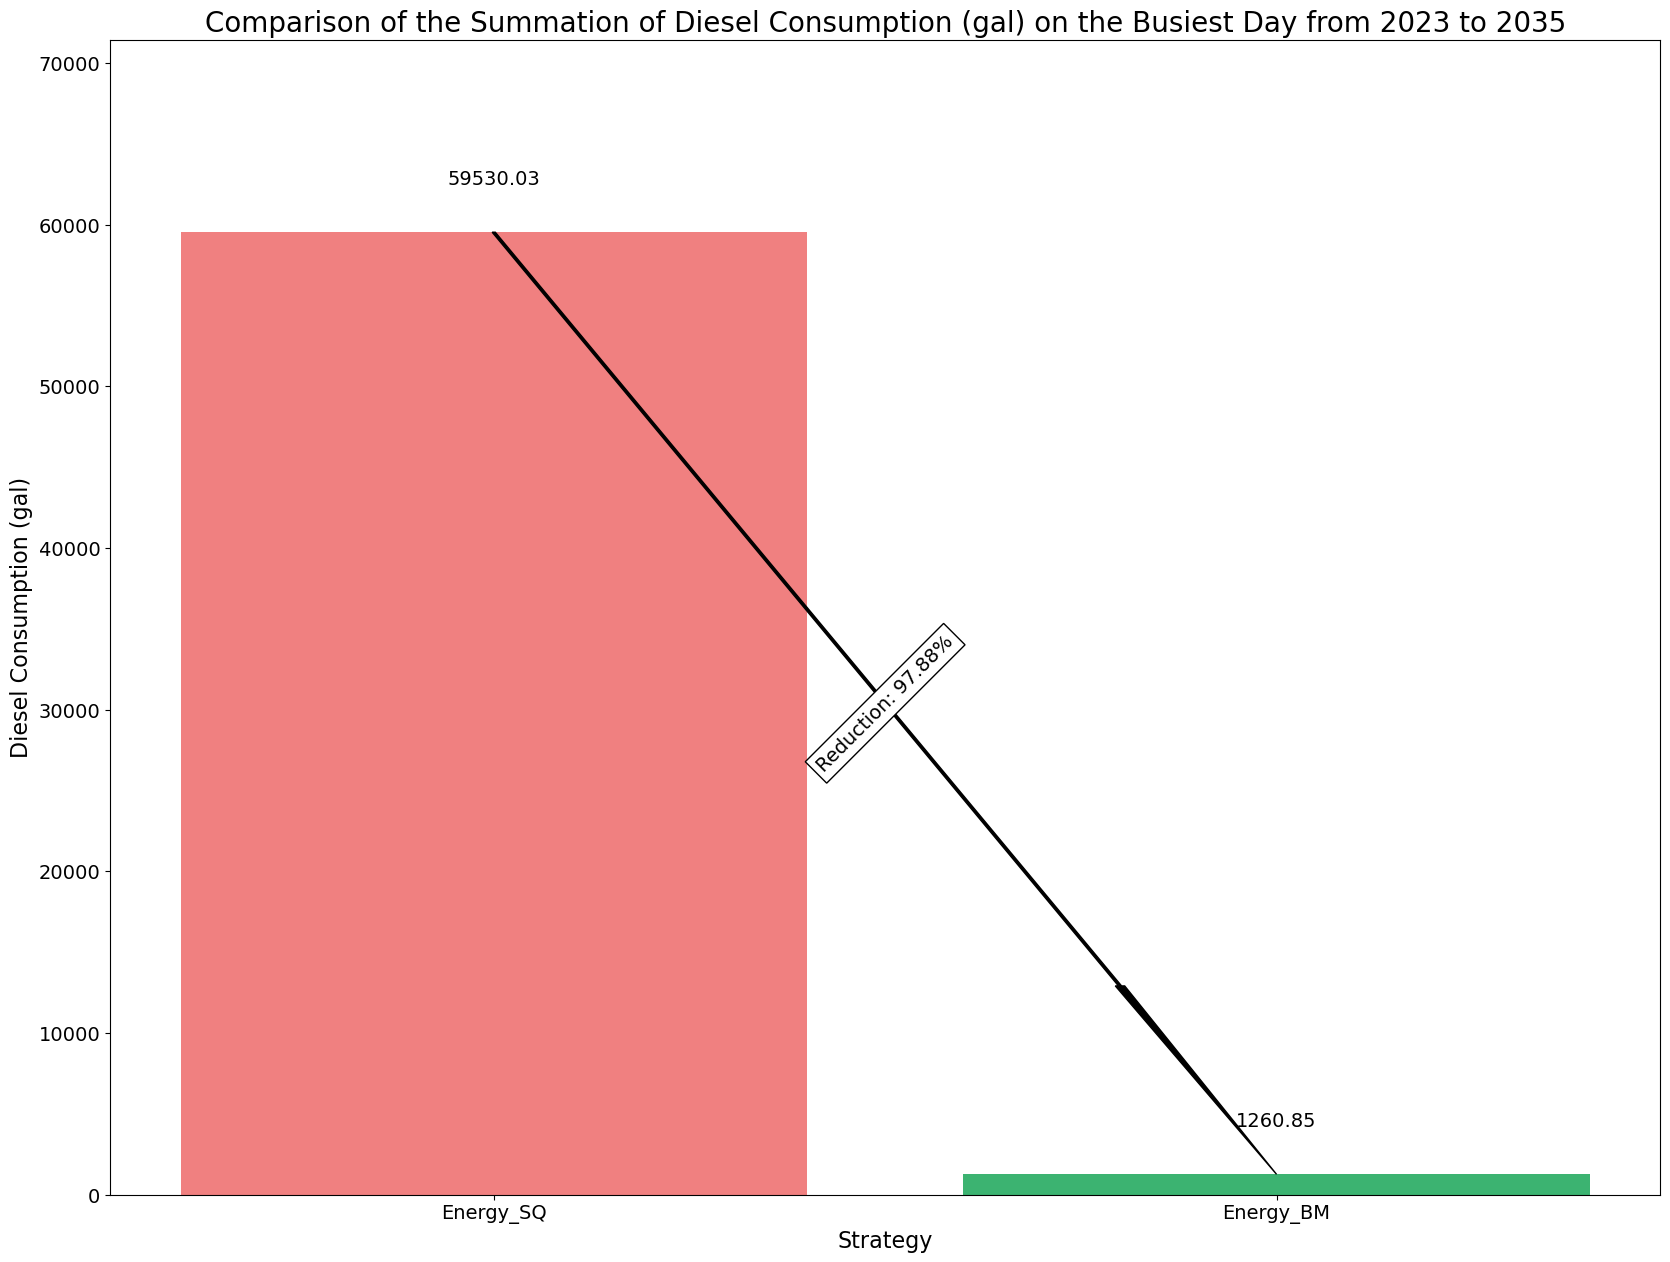

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the percent reduction
reduction = ((Energy_SQ - Energy_BM) / Energy_SQ) * 100

# Create lists for the plot
energy_types = ['Energy_SQ', 'Energy_BM']
values = [Energy_SQ, Energy_BM]
colors = ['lightcoral', 'mediumseagreen']

# Create a figure and a set of subplots with larger size
fig, ax = plt.subplots(figsize=(20, 15))

# Create a bar plot
bars = ax.bar(energy_types, values, color=colors)

# Set the title and labels with larger font sizes
ax.set_title('Comparison of the Summation of Diesel Consumption (gal) on the Busiest Day from 2023 to 2035', fontsize=20)
ax.set_xlabel('Strategy', fontsize=16)
ax.set_ylabel('Diesel Consumption (gal)', fontsize=16)

# Increase the font size for tick labels
ax.tick_params(axis='both', labelsize=14)

# Increase the ylim to make room for the annotations
ax.set_ylim([0, max(values)*1.2])

# Show actual energy values on top of each bar
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05*max(values), round(bar.get_height(), 2), ha='center', fontsize=14)

# Draw an arrow between the tops of the bars
arrow = plt.Arrow(0, values[0], 1, values[1]-values[0], color='black', width=0.02)
ax.add_patch(arrow)

# Annotate the arrow with the percent reduction
ax.text(0.5, np.mean(values), 'Reduction: {:.2f}%'.format(reduction), color='black', ha='center', va='center', rotation=45, fontsize=14, bbox=dict(facecolor='white', edgecolor='black'))

# Make plot cleaner
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

# Display the plot
plt.show()


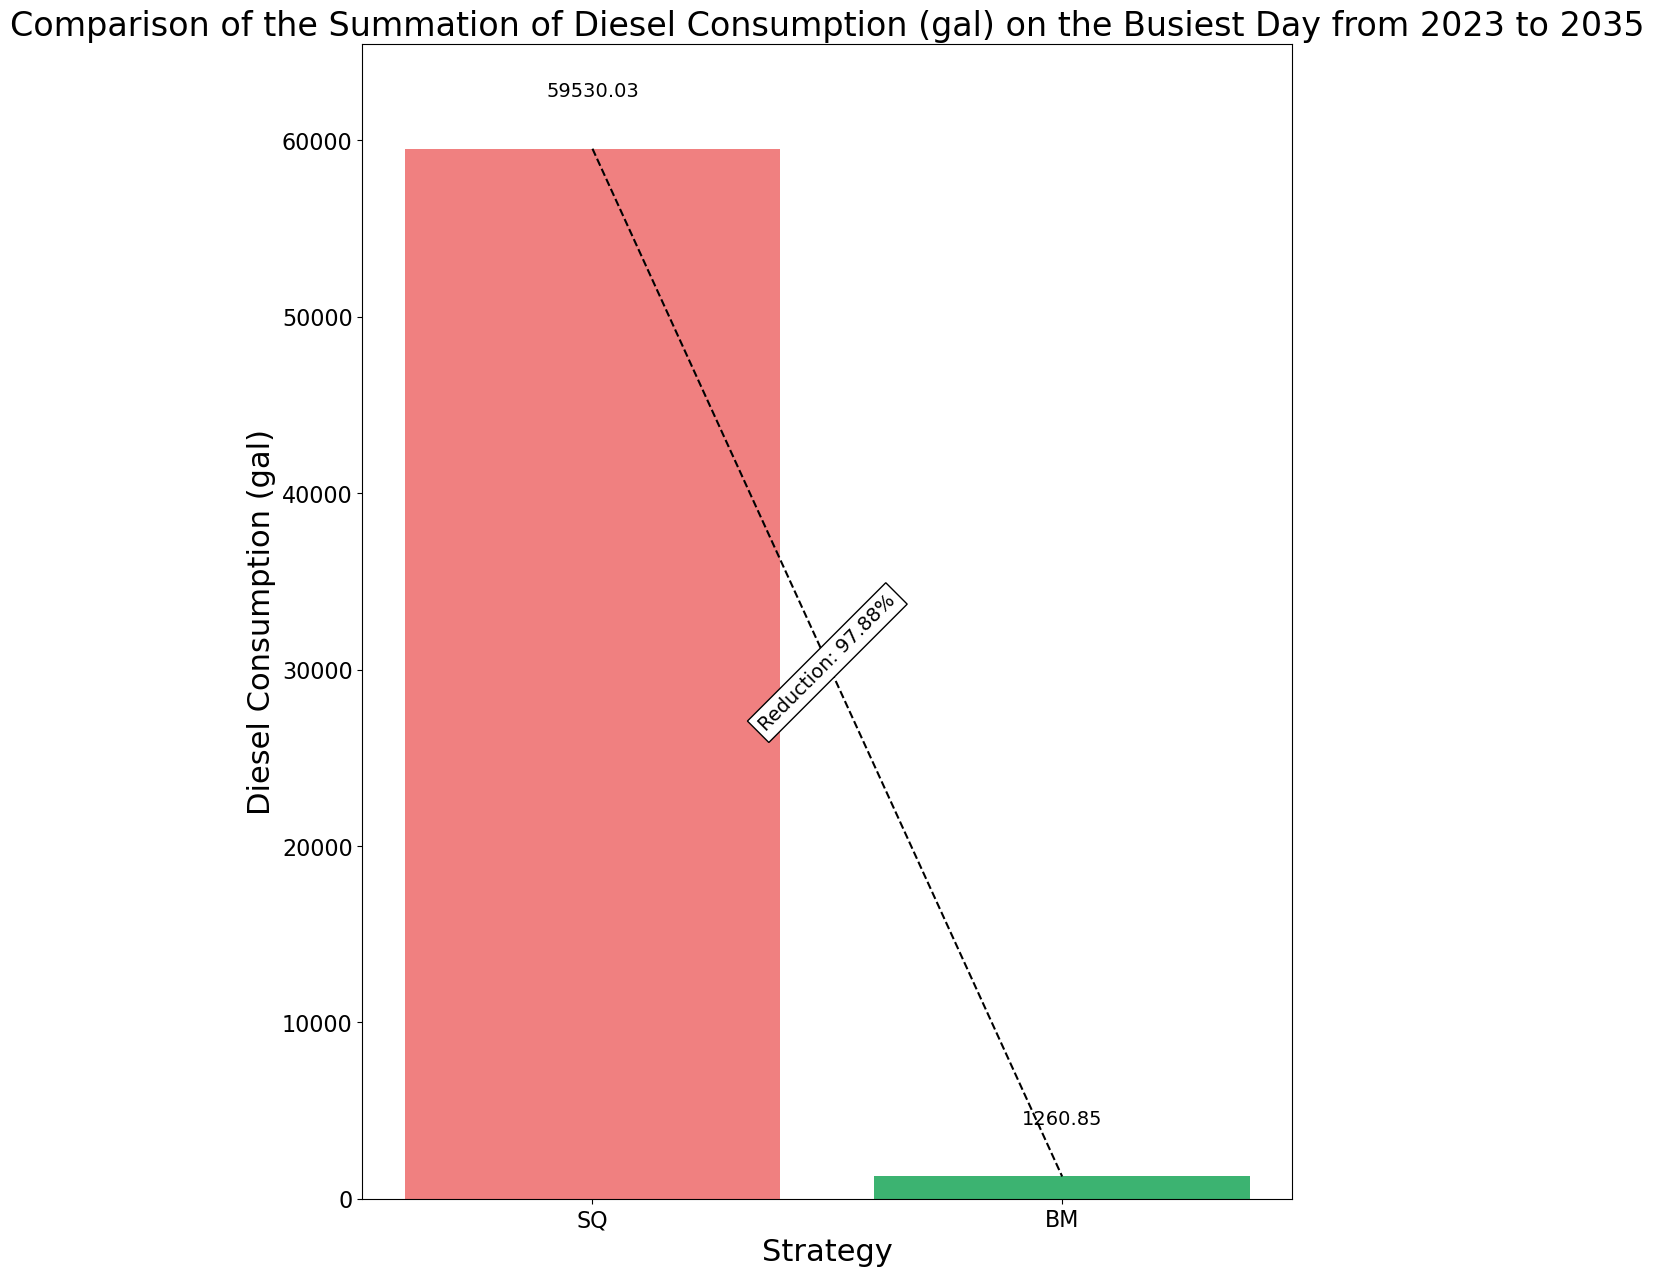

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the percent reduction
reduction = ((Energy_SQ - Energy_BM) / Energy_SQ) * 100

# Create lists for the plot
energy_types = ['SQ', 'BM']
values = [Energy_SQ, Energy_BM]
colors = ['lightcoral', 'mediumseagreen']

# Create a figure and a set of subplots with larger size
fig, ax = plt.subplots(figsize=(12, 15))

# Create a bar plot
bars = ax.bar(energy_types, values, color=colors)

# Set the title and labels with larger font sizes
ax.set_title('Comparison of the Summation of Diesel Consumption (gal) on the Busiest Day from 2023 to 2035', fontsize=24)
ax.set_xlabel('Strategy', fontsize=22)
ax.set_ylabel('Diesel Consumption (gal)', fontsize=22)

# Increase the font size for tick labels
ax.tick_params(axis='both', labelsize=16)

# Increase the ylim to make room for the annotations
ax.set_ylim([0, max(values)*1.1])

# Show actual energy values on top of each bar
for bar in bars:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05*max(values), round(bar.get_height(), 2), ha='center', fontsize=14)

# Draw a line between the tops of the bars
plt.plot(energy_types, values, color='black', linestyle='dashed')

# Annotate the line with the percent reduction
ax.text(0.5, np.mean(values), 'Reduction: {:.2f}%'.format(reduction), color='black', ha='center', va='center', rotation=45, fontsize=14, bbox=dict(facecolor='white', edgecolor='black'))

# Make plot cleaner
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

# Display the plot
plt.show()


In [12]:
SQ =pd.read_csv(r'../../results/computed-fuel-rates-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [14]:
SQ.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'ServiceDateTime', 'DateKey', 'CalendarDate', 'Year',
       'Month', 'OpKey', 'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName',
       'TripKey', 'Trip', 'StopKey', 'Stop', 'StopName', 'Vehicle',
       'VehicleType', 'SeatedCap', 'TotalCap', 'Lat', 'Lon', 'Boards',
       'Alights', 'Onboard', 'Bike', 'Daytype', 'Hour', 'Minute', 'Second',
       'Date', 'Powertrain', 'VehicleModel', 'Vehicle_mass',
       'time_delta_in_seconds', 'dist', 'Speed', 'Acceleration', 'elevation',
       'grade', 'Energy'],
      dtype='object')

In [15]:
SQ_filtered=SQ.loc[SQ['Energy']!=0]

In [16]:
SQ_filtered['fuel_economy']=SQ_filtered['dist']/SQ_filtered['Energy']

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_18744\2483716122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SQ_filtered['fuel_economy']=SQ_filtered['dist']/SQ_filtered['Energy']


In [17]:
SQ_filtered['fuel_economy'].loc[SQ_filtered['Powertrain']=='conventional'].mean()

5.521903831433052

In [18]:
SQ_filtered['fuel_economy'].loc[SQ_filtered['Powertrain']=='hybrid'].mean()

5.616346199503734

In [21]:
SQ_filtered = SQ_filtered[SQ_filtered['fuel_economy'].notna()]

In [22]:
SQ_filtered['fuel_economy'].loc[SQ_filtered['Powertrain']=='electric'].mean()

nan